In [ ]:
# Install essential libraries
!pip install -q tensorflow keras opencv-python matplotlib pillow

# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!mkdir -p /content/data
!unzip -q "/content/PetImages.zip" -d "/content/data/"

In [ ]:
import os
os.listdir('/content/data')

['PetImages']

In [ ]:
import os
os.listdir('/content/data/PetImages')

['Dog', 'Cat']

In [ ]:
['Cat', 'Dog']  # or lowercase, depending on your zip

['Cat', 'Dog']

In [ ]:
from PIL import Image

def remove_corrupt_images(folder_path):
    for category in ['Cat', 'Dog']:
        path = os.path.join(folder_path, category)
        for fname in os.listdir(path):
            try:
                img_path = os.path.join(path, fname)
                with Image.open(img_path) as img:
                    img.verify()
            except:
                os.remove(img_path)

remove_corrupt_images('/content/data/PetImages')
print("✅ Corrupt images removed")

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


✅ Corrupt images removed


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/data/PetImages',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/data/PetImages',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 552s 879ms/step - accuracy: 0.5861 - loss: 0.6909 - val_accuracy: 0.7167 - val_loss: 0.5492
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 555s 889ms/step - accuracy: 0.7292 - loss: 0.5326 - val_accuracy: 0.7786 - val_loss: 0.4763
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 613s 971ms/step - accuracy: 0.7975 - loss: 0.4289 - val_accuracy: 0.7930 - val_loss: 0.4476
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 554s 888ms/step - accuracy: 0.8342 - loss: 0.3716 - val_accuracy: 0.7988 - val_loss: 0.4394
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 552s 885ms/step - accuracy: 0.8680 - loss: 0.2936 - val_accuracy: 0.8032 - val_loss: 0.4359
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 552s 884ms/step - accuracy: 0.8995 - loss: 0.2359 - val_accuracy: 0.8065 - val_loss: 0.4761
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 560s 882ms/step - accuracy: 0.9304 - loss: 0.1723 - val_accuracy: 0.8089 - val_loss: 0.5310
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 544s 871ms/step - accuracy: 0.9515 -

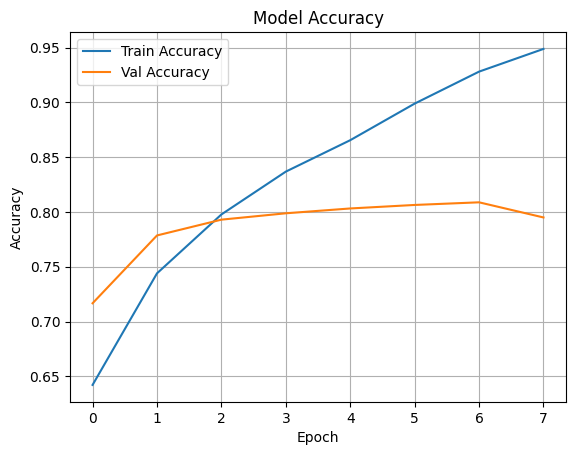

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"
    print(f"Prediction: {label} (Confidence: {round(prediction * 100, 2)}%)")

# Try with an example:
predict_image('/content/data/PetImages/Dog/1000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: Cat 🐱 (Confidence: 13.220000267028809%)


In [ ]:
model.save('/content/cat_dog_classifier_model.h5')
print("✅ Model saved")

✅ Model saved


In [ ]:
print(history.history['accuracy'][-1])       # Last epoch training accuracy
print(history.history['val_accuracy'][-1])   # Last epoch validation accuracy

0.9489182829856873
0.7950310707092285


In [ ]:
predict_image('/content/data/PetImages/Dog/1234.jpg')
predict_image('/content/data/PetImages/Cat/5678.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction: Dog 🐶 (Confidence: 99.81999969482422%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Cat 🐱 (Confidence: 0.3700000047683716%)


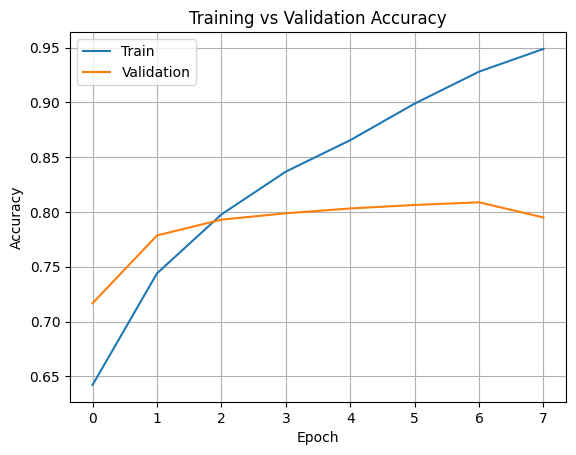

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image as PILImage
from tensorflow.keras.preprocessing import image
import numpy as np
import io

In [ ]:
def predict_uploaded_image(uploaded_file):
    img = PILImage.open(io.BytesIO(uploaded_file)).resize((128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0][0]
    label = "Dog 🐶" if pred > 0.5 else "Cat 🐱"
    confidence = round(pred * 100 if pred > 0.5 else (1 - pred) * 100, 2)
    return label, confidence

In [26]:
upload_widget = widgets.FileUpload(
    accept='image/*',
    multiple=False
)

button = widgets.Button(description="Predict", button_style='success')
output = widgets.Output()

def on_click(change):
    with output:
        clear_output()
        if upload_widget.value:
            uploaded_file = list(upload_widget.value.values())[0]['content']
            label, confidence = predict_uploaded_image(uploaded_file)
            display(PILImage.open(io.BytesIO(uploaded_file)))
            print(f"\nPrediction: {label}")
            print(f"Confidence: {confidence}%")
        else:
            print("Please upload an image first.")

button.on_click(on_click)
display(widgets.VBox([upload_widget, button, output]))